<a href="https://colab.research.google.com/github/iqbalamo93/Autoencoder/blob/master/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook

In [36]:
from sklearn.datasets import make_blobs

In [37]:
data  = make_blobs(n_samples=300,n_features= 2,
                   centers = 2,
                   cluster_std=1,random_state=101)

In [38]:
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [39]:
X, y = data

In [40]:
np.random.seed(101)

In [41]:
z_noise = np.random.normal(size=len(X))
Z_noise = pd.Series(z_noise)

In [42]:
feat = pd.DataFrame(X)

In [43]:
feat = pd.concat([feat,Z_noise],axis=1)

In [44]:
feat.columns = ['X1','X2','X3']

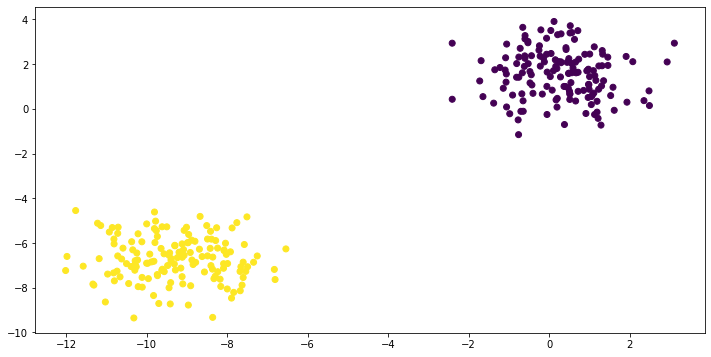

In [45]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(feat['X1'],feat['X2'],c=y)

In [46]:
from mpl_toolkits.mplot3d import Axes3D

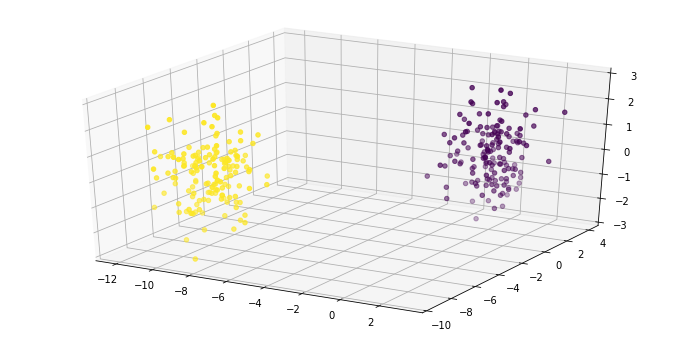

In [47]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  

In [49]:
from tensorflow.keras.optimizers import SGD

In [50]:
#3-->2-->3

encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [51]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [52]:
autoencoder = Sequential([encoder, decoder])#encoder learn best way to reduce,and decoder tp separate

In [53]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler= MinMaxScaler()

In [56]:
scaled_data=scaler.fit_transform(feat)

In [57]:
autoencoder.fit(scaled_data,scaled_data,epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2676
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2524
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2371
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2243
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2216
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2203
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2193
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2189
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2188


In [58]:
  encoded_2d = encoder.predict(scaled_data)

In [59]:
encoded_2d

array([[0.73839027, 0.        ],
       [0.        , 0.        ],
       [0.0467214 , 0.        ],
       [0.5790664 , 0.        ],
       [0.81116   , 0.        ],
       [0.7629539 , 0.        ],
       [0.        , 0.        ],
       [0.7606463 , 0.        ],
       [0.        , 0.        ],
       [0.01174611, 0.        ],
       [0.72269475, 0.        ],
       [0.77906466, 0.        ],
       [0.        , 0.        ],
       [0.5491736 , 0.        ],
       [0.        , 0.        ],
       [0.57153964, 0.        ],
       [0.05625528, 0.        ],
       [0.01807302, 0.        ],
       [0.15247053, 0.        ],
       [0.        , 0.        ],
       [0.7728026 , 0.        ],
       [0.06394631, 0.        ],
       [0.        , 0.        ],
       [0.60701746, 0.        ],
       [0.8075594 , 0.        ],
       [0.        , 0.        ],
       [0.03913444, 0.        ],
       [0.        , 0.        ],
       [0.71987456, 0.        ],
       [0.7721807 , 0.        ],
       [0.

In [60]:
encoded_2d.shape

(300, 2)

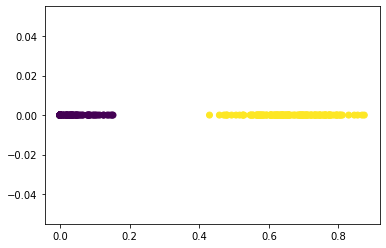

In [62]:
plt.scatter(encoded_2d[:,0],encoded_2d[:,1],c=y)

In [63]:
decoded_3d = decoder.predict(encoded_2d)

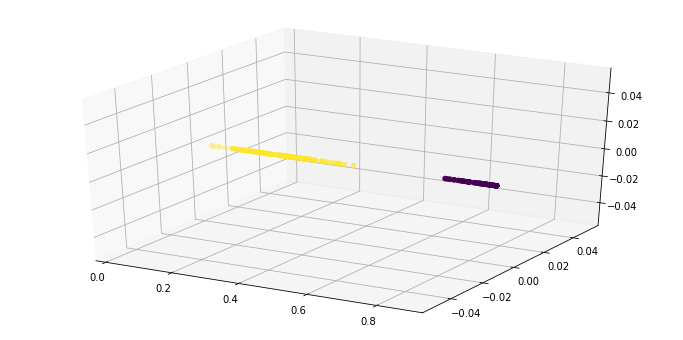

In [66]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.scatter(decoded_3d[:,0],decoded_3d[:,1],decoded_3d[:,2],c=y)